In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
%pip install matplotlib_venn
from matplotlib_venn import venn2

with open("../most_sensitive_indices_in_training.json") as f:
    sensitive_neurons = json.load(f)

with open("../most_effective_indices_on_eigenscore.json") as f:
    effective_neurons = json.load(f)





[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[1.0036257655759355, 1.002588686870781, 1.002423864427538, 1.0024140575906004, 1.002386168800638, 1.002384461203458, 1.0022841922724146, 1.0022361932696788, 1.0022315327731501, 1.0022160766102017, 1.0022078542932327, 1.00219851763605, 1.0021919216076274, 1.0021307349551283, 1.002069887065744, 1.0020460795053963, 1.002036749082922, 1.0020140228302825, 1.0019431597909525, 1.0019287664857843]
[5.582488469577502, 4.522732609264269, 4.8289946005062285, 5.310174636055348, 2.1245704654572135, 3.0233043900396606, 3.2573056776933274, 3.7020221262962707, 2.7485077785740444, 3.913081939676241, 3.409946583960073, 2.524883410079813, 2.937734340635484, 5.262191761862117, 3.093875549792781, 2.78309882511581, 4.171440870972077, 10.514997416872808, 3.792268564996914, 3.516544486371053]


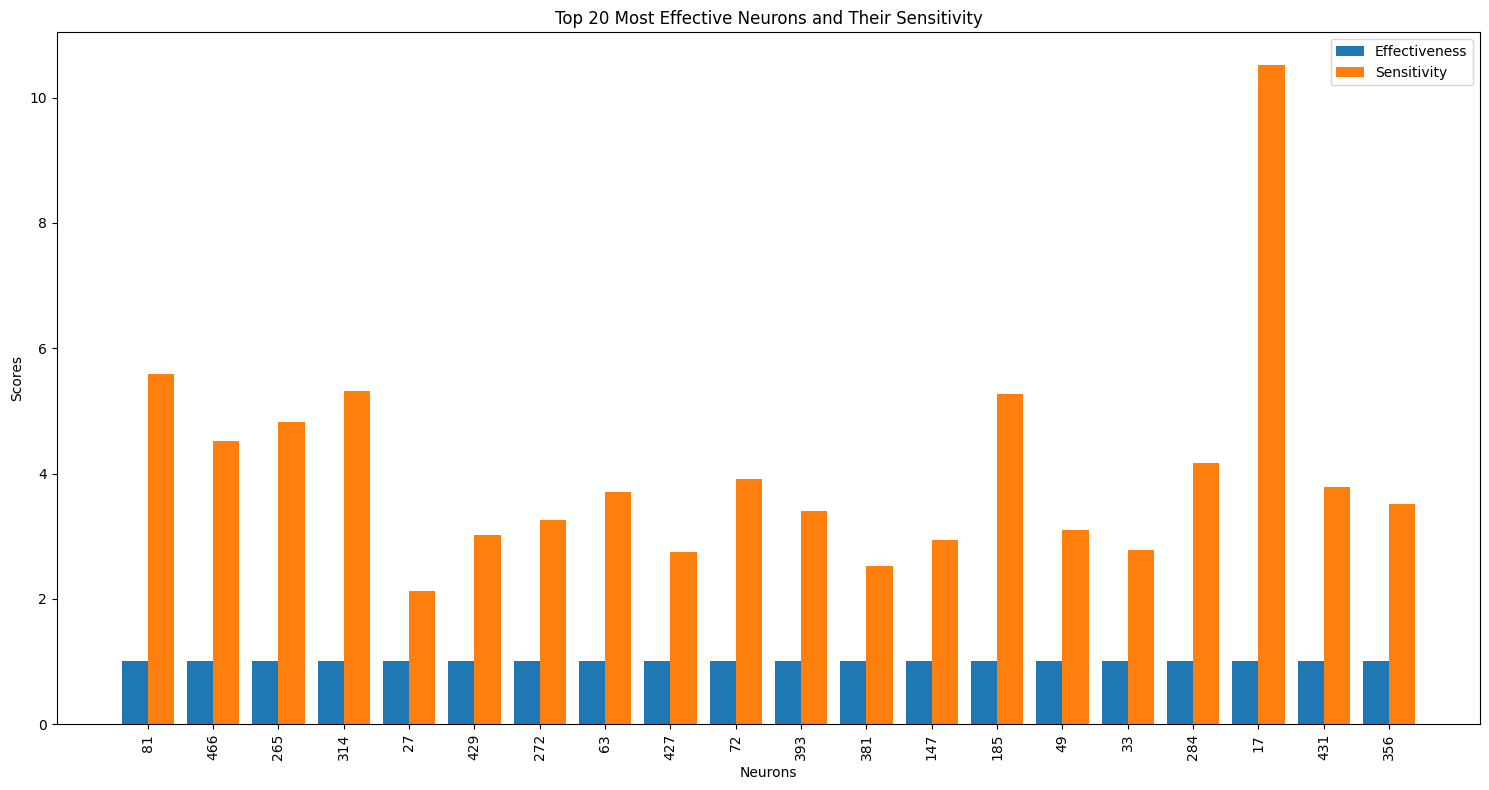

In [15]:

# Step 2: Sort Neurons by Effectiveness in Descending Order
effective_neurons_sorted = sorted(effective_neurons.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 most effective neurons
top_effective_neurons = effective_neurons_sorted[:20]

# Extract sorted neuron indices and their effectiveness and sensitivity scores
neurons_sorted = [int(neuron[0]) for neuron in top_effective_neurons]
effectiveness_scores = [neuron[1] for neuron in top_effective_neurons]
print(effectiveness_scores)
sensitivity_scores = [sensitive_neurons.get(str(neuron[0]), 0) for neuron in top_effective_neurons]
print(sensitivity_scores)
# Step 3: Plot the Bar Chart
x = np.arange(len(neurons_sorted))  # the label locations

fig, ax = plt.subplots(figsize=(15, 8))
width = 0.4  # the width of the bars

rects1 = ax.bar(x - width/2, effectiveness_scores, width, label='Effectiveness')
rects2 = ax.bar(x + width/2, sensitivity_scores, width, label='Sensitivity')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Neurons')
ax.set_ylabel('Scores')
ax.set_title('Top 20 Most Effective Neurons and Their Sensitivity')
ax.set_xticks(x)
ax.set_xticklabels(neurons_sorted, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()